## Random Forest Classifier Testing
In this notebook, test a Random Forest classifier from scikit learn for image classification of the sea lion chips.

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import random
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split

##### Retrieve the arrays and labels via pickle. Assign arrays to X (our training features) and labels to y (our training target/labels)

In [24]:
with open('image_arrays.pkl', 'rb') as f:
    X = pickle.load(f)
with open('image_labels.pkl', 'rb') as f:
    y = pickle.load(f)

In [25]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([676,  77, 150, 281,  45], dtype=int64))

##### Create train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.12,
                                                    random_state=42,
                                                    shuffle=True)

##### Initialize the classifier and fit to the training data:
- RandomizedSearchCV was used to identify best parameters for the RF Classifier, so we set them explicitly here.

In [9]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##### Predict on subset of the test data

In [10]:
print(
    "Label codes:  {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}"
)
print("Predictions: ", rf_clf.predict(X_test[0:20]))
print("Actual classes: ", y_test[0:20])

Label codes:  {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}
Predictions:  [3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 0 3 0 3]
Actual classes:  [3, 0, 0, 2, 0, 1, 1, 3, 1, 2, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3]


##### Create confusion matrix - good explanation here if unfamiliar: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In [17]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)

conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[586,   0,   1,  15,   2],
       [ 62,   2,   0,   2,   1],
       [110,   0,   0,  16,   0],
       [ 31,   0,   0, 209,   0],
       [ 34,   3,   0,   3,   4]], dtype=int64)

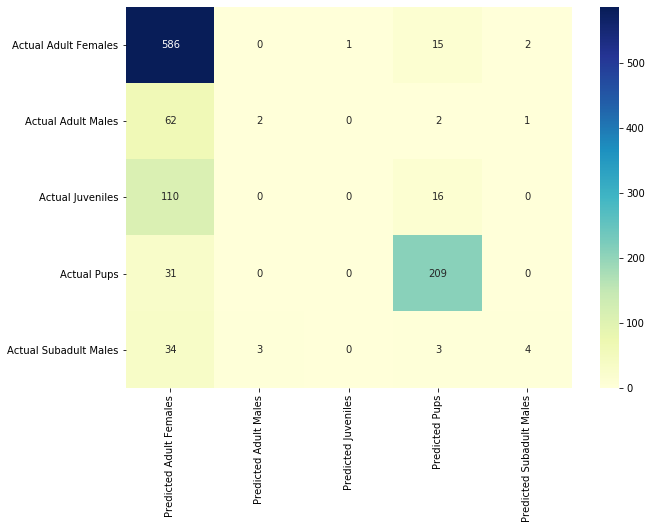

In [41]:
label_codes = {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}
classes = ['Adult Females', 'Adult Males', 'Juveniles', 'Pups', 'Subadult Males']
df_conf_matrix = pd.DataFrame(conf_matrix, index = [f'Actual {c}' for c in classes],
                             columns = [f'Predicted {c}' for c in classes])
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.heatmap(df_conf_matrix,  cmap="YlGnBu", annot=True, fmt='d')

In [16]:
# with test
y_pred = cross_val_predict(rf_clf, X_test, y_test, cv=3)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([[68,  0,  1,  3,  0],
       [ 9,  0,  0,  1,  0],
       [17,  0,  4,  3,  0],
       [ 4,  0,  1, 36,  0],
       [ 1,  0,  0,  0,  0]], dtype=int64)

A leaning towards adult_female class is apparent here... Bias introduced by so many adult_female chips?

### Scoring Metrics

##### Mean accuracy

In [10]:
print("Mean accuracy score for Random Forest Classifier: ", \
      cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Mean accuracy score for Random Forest Classifier:  0.742948327689996


##### F1 Scores

In [11]:
f1_score(y_train, y_train_pred, average=None)

array([0.82130343, 0.05555556, 0.        , 0.86185567, 0.15686275])